<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Exploration-géographique" data-toc-modified-id="Exploration-géographique-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration géographique</a></span><ul class="toc-item"><li><span><a href="#São-Paulo" data-toc-modified-id="São-Paulo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>São Paulo</a></span></li><li><span><a href="#Comparaison-avec-la-seconde-ville,-Rio-de-Janeiro." data-toc-modified-id="Comparaison-avec-la-seconde-ville,-Rio-de-Janeiro.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparaison avec la seconde ville, Rio de Janeiro.</a></span></li></ul></li><li><span><a href="#Exploration-des-catégories-de-produits" data-toc-modified-id="Exploration-des-catégories-de-produits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploration des catégories de produits</a></span><ul class="toc-item"><li><span><a href="#Catégories-les-plus-rentables" data-toc-modified-id="Catégories-les-plus-rentables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Catégories les plus rentables</a></span></li><li><span><a href="#Bed,-bath,-table" data-toc-modified-id="Bed,-bath,-table-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bed, bath, table</a></span></li></ul></li><li><span><a href="#Corrélation" data-toc-modified-id="Corrélation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Corrélation</a></span></li><li><span><a href="#Tendances-clients" data-toc-modified-id="Tendances-clients-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tendances clients</a></span><ul class="toc-item"><li><span><a href="#Distributions-des-achats/commandes." data-toc-modified-id="Distributions-des-achats/commandes.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Distributions des achats/commandes.</a></span></li><li><span><a href="#Score" data-toc-modified-id="Score-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Score</a></span></li><li><span><a href="#Fréquence-d'achat" data-toc-modified-id="Fréquence-d'achat-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Fréquence d'achat</a></span></li></ul></li></ul></div>

# Projet 5 Notebook d'analyse exploratoire

## Introduction

In [345]:
# Import usuels
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import missingno as msno
import warnings
sns.set_theme()
warnings.filterwarnings("ignore")

Les données fournies sont séparées en plusieurs .csv, qui sont reliés par un customer_id. La première étape sera de tout regrouper.

In [346]:
# Mise en place des dataframes
customers_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_customers_dataset.csv")
geo_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_geolocation_dataset.csv")
orderitem_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_items_dataset.csv")
orderpay_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_payments_dataset.csv")
orderreviews_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_order_reviews_dataset.csv")
orders_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_orders_dataset.csv")
products_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_products_dataset.csv")
sellers_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/olist_sellers_dataset.csv")
categname_df = pd.read_csv(
    "/Users/loicvalenti/Library/Mobile Documents/com~apple~CloudDocs/Formation Data Science/PROJECT 5/DATA/product_category_name_translation.csv")

Ici on merge tous les dataframes entre eux grâce aux identifiers fournis dans chacun des dataframes. 

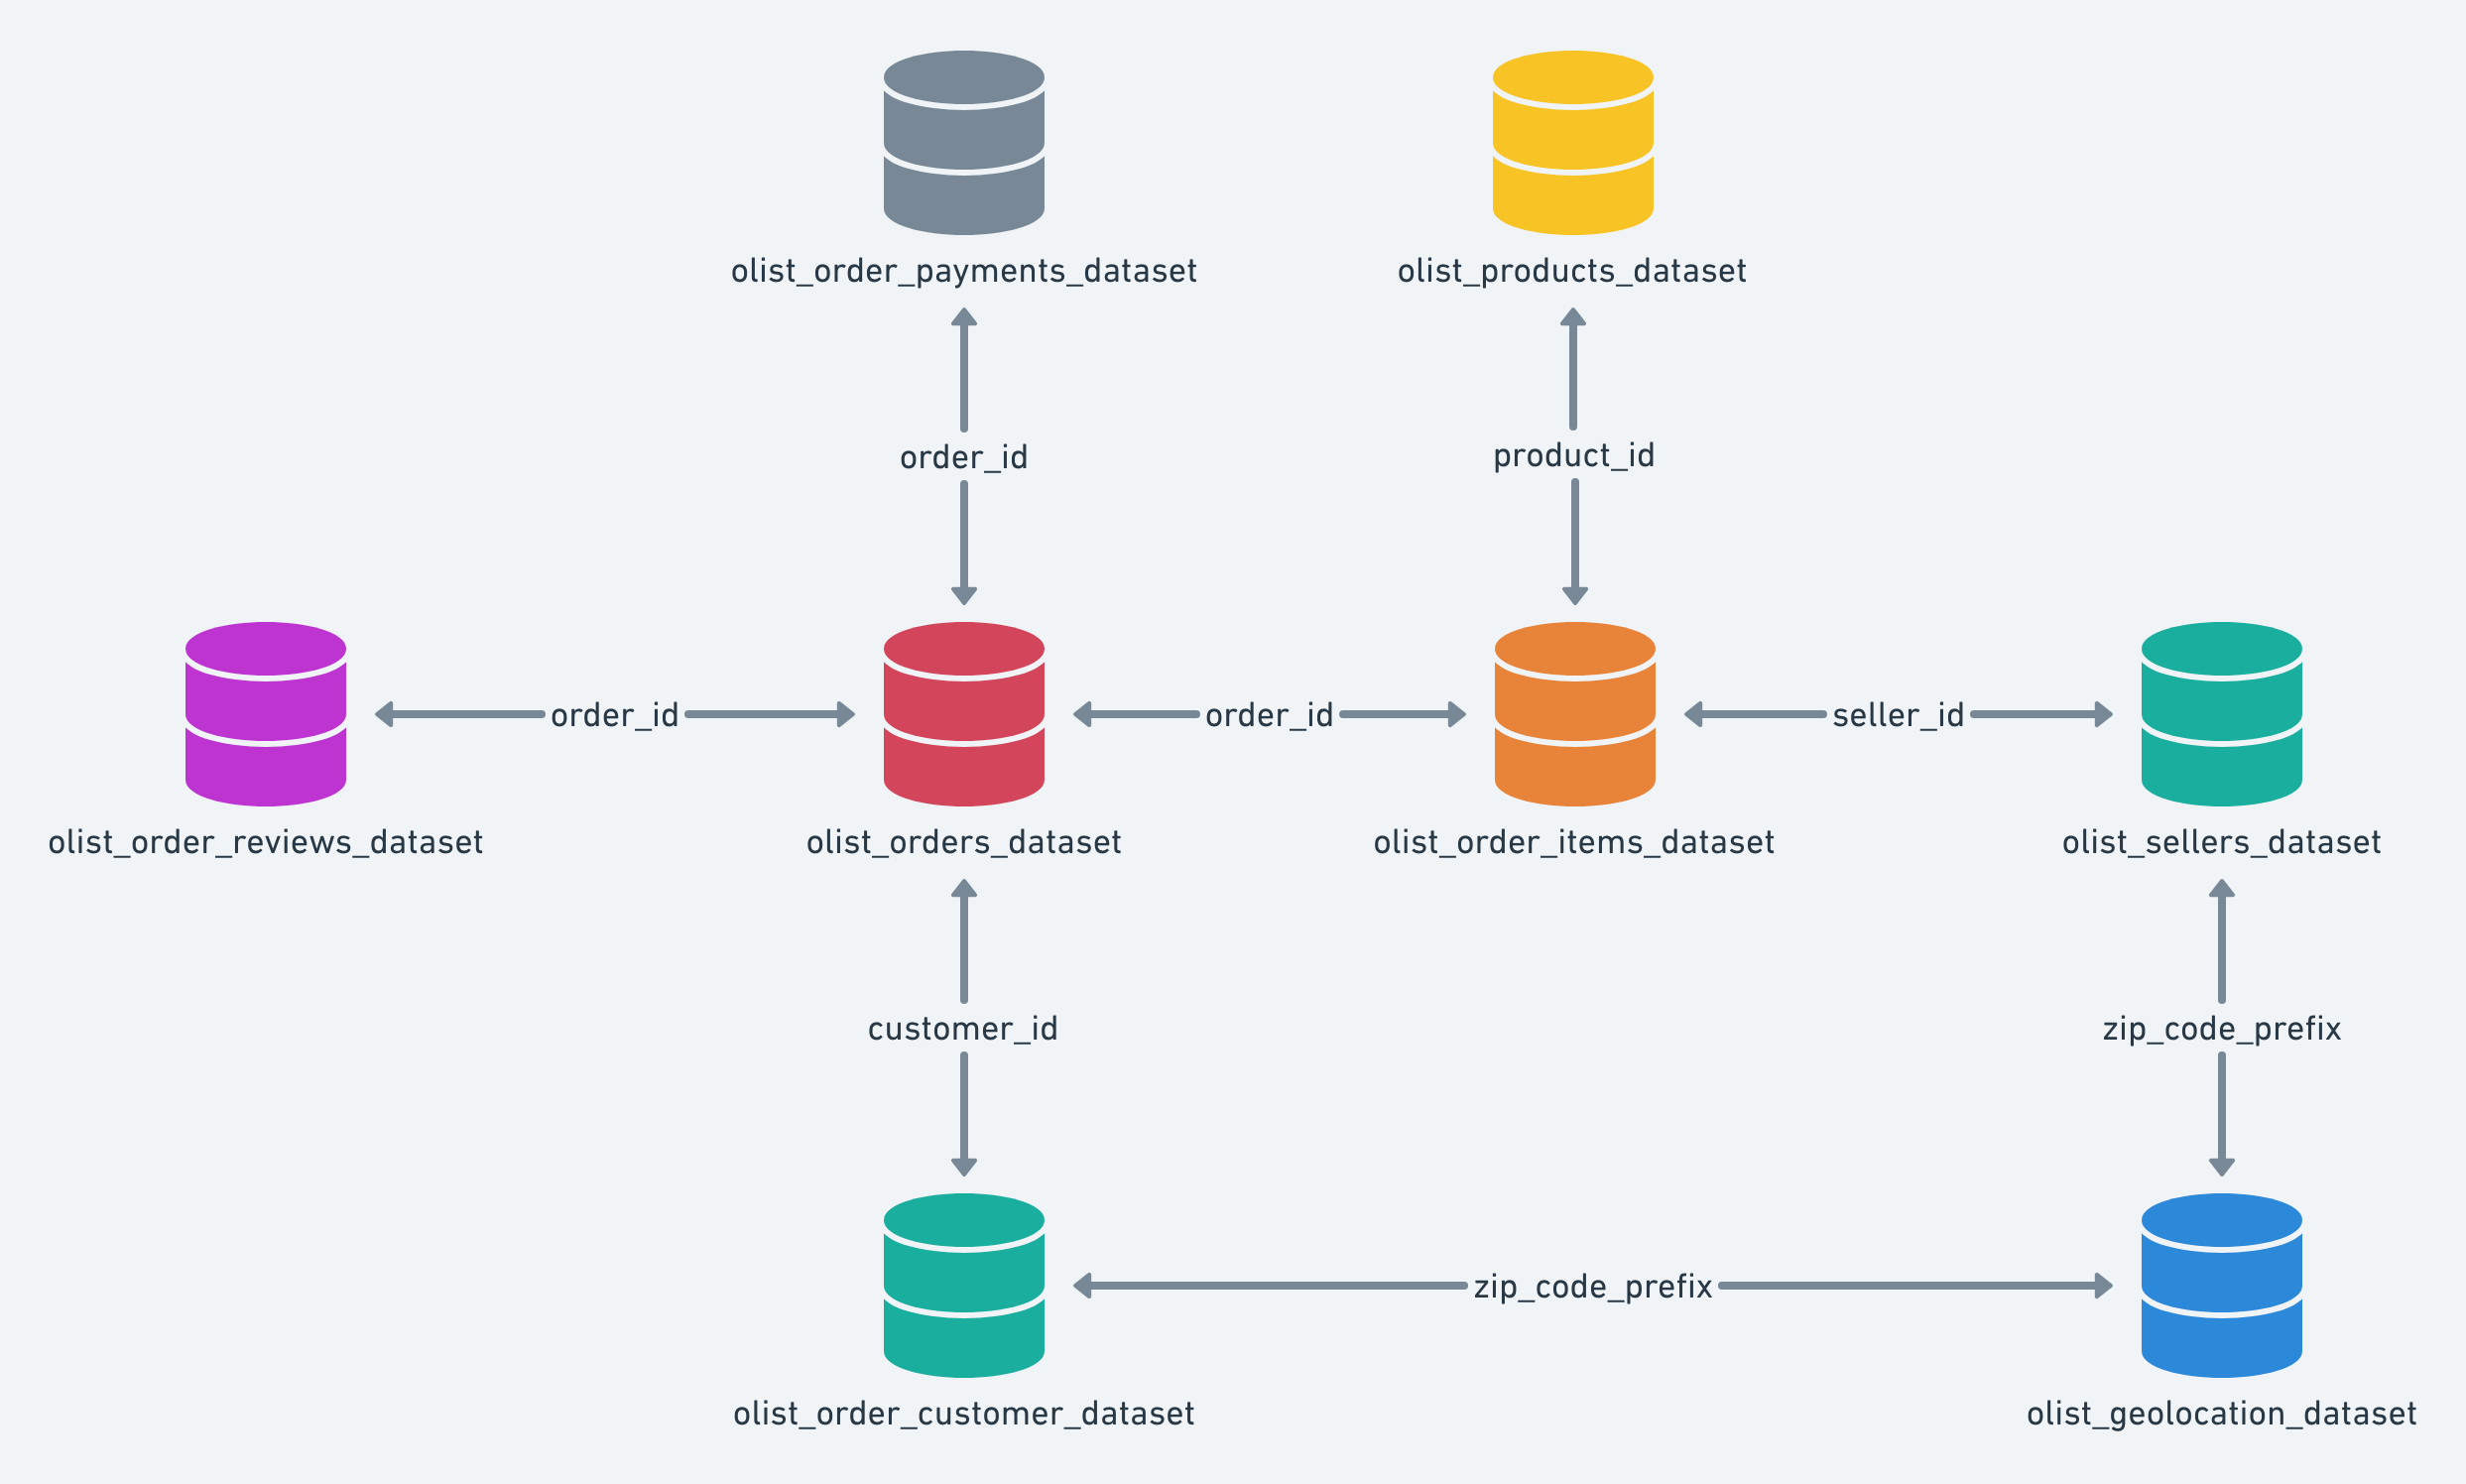

credit https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce @kaggle pour le schéma

In [347]:
main_dataframe = orders_df.merge(customers_df, on="customer_id").merge(orderitem_df, on="order_id").merge(products_df, on="product_id").merge(
    categname_df, on="product_category_name").merge(orderpay_df, on="order_id").merge(sellers_df, on="seller_id").merge(orderreviews_df, on="order_id")

In [348]:
main_dataframe.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23


Nous avons donc un tableau qui comprends toutes les informations associés à un id de client, le statut de la commande, la date d'achat, la date de livraison, le score sur 5, le commentaires, le prix, la localisation, etc...

In [349]:
main_dataframe.isna().mean().sort_values(ascending=False)

review_comment_title             0.880623
review_comment_message           0.576971
order_delivered_customer_date    0.020760
order_delivered_carrier_date     0.010337
order_approved_at                0.000121
product_length_cm                0.000009
product_height_cm                0.000009
product_width_cm                 0.000009
product_weight_g                 0.000009
payment_installments             0.000000
product_category_name_english    0.000000
payment_sequential               0.000000
payment_type                     0.000000
order_id                         0.000000
payment_value                    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
review_id                        0.000000
review_score                     0.000000
review_creation_date             0.000000
seller_state                     0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
customer_id                      0

In [350]:
main_dataframe.duplicated().sum()

0

À première vue, aucune ligne ne semble être dupliquée. 
Seulement les deux colonnes en rapport avec la revue présentent des manquants. Cependant ces colonnes ne paraissent pas essentielles à l'analyse.

<AxesSubplot:>

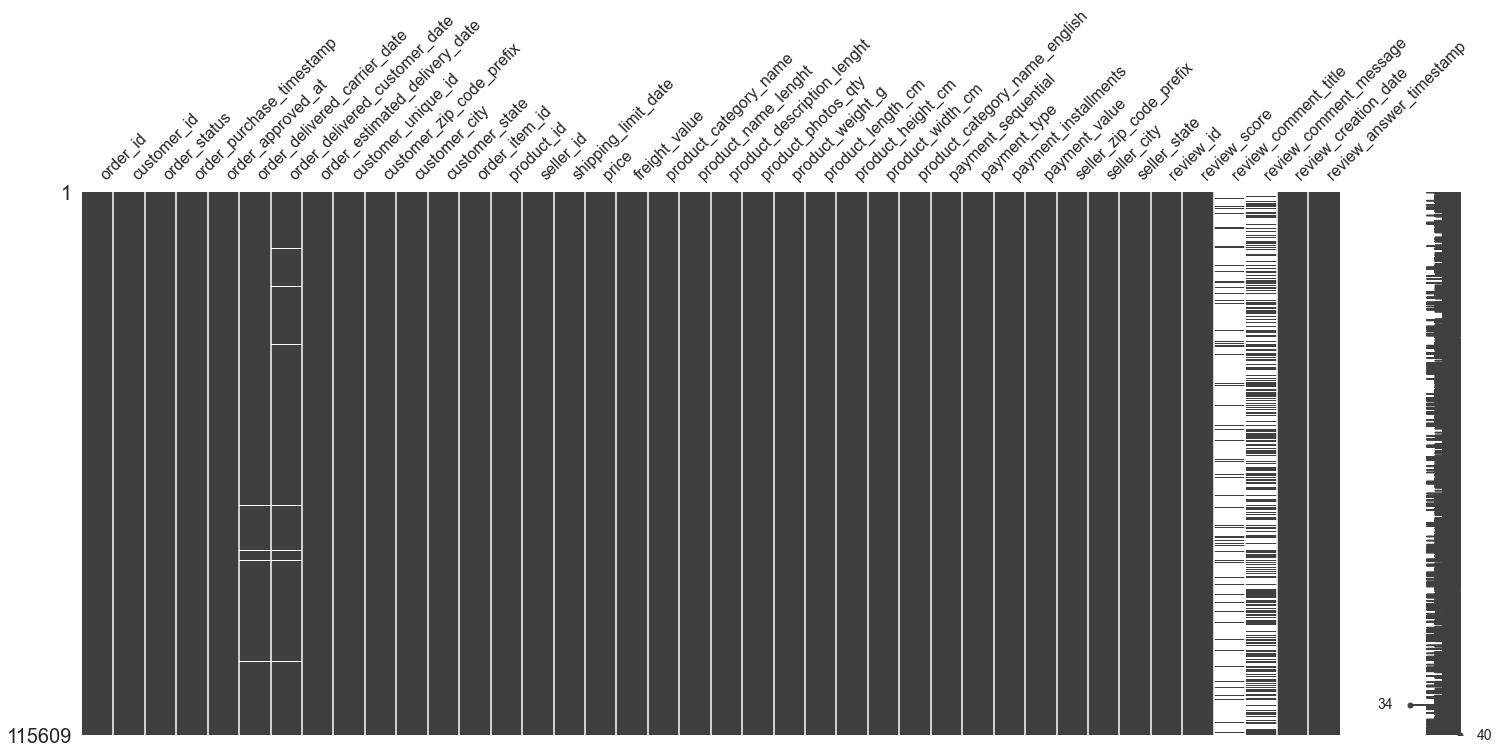

In [351]:
msno.matrix(main_dataframe)

## Exploration géographique

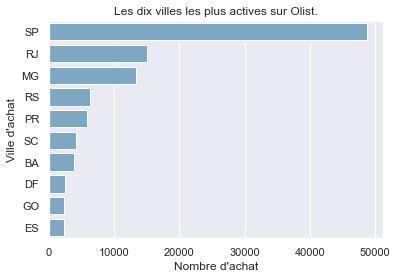

In [352]:
ville_ranked = main_dataframe.groupby("customer_state")["order_id"].count(
).reset_index().sort_values("order_id", ascending=False)

# Aggrégation de doonées pour rank un dataframe avec les bonnes colonnes

ville_ranked.rename(columns={"order_id": "Nombre d'achat"}, inplace=True)
ville_ranked.rename(columns={"customer_state": "Ville d'achat"}, inplace=True)

# Rename pour lisibilité

ax = sns.barplot(x="Nombre d'achat", y="Ville d'achat",
                 data=ville_ranked[:10], orient='h', palette = sns.color_palette(palette = "PuBu", n_colors = 1))
ax.set_title("Les dix villes les plus actives sur Olist.")
plt.savefig("Les dix villes les plus actives sur Olist", dpi=300)

# dpi = 300 pour la présentation

La ville de São Paulo est très largement la plus consomatrice des produits fournis par Olist. En deuxième se place Rio de Janeiro et en troisième Minas Gerais.

Explorons plus en détails les tendances de São Paulo.

### São Paulo

In [353]:
ville_ranked_sao_paulo = main_dataframe.loc[main_dataframe["customer_state"] == "SP"]

In [354]:
ville_ranked_sao_paulo

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115600,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,5f684afb3d1a02f2787e80cb0eee6e02,2927,...,31.42,5201,sao paulo,SP,5243cd88a813b3c898f336f372cb0a7b,5,NaN,NaN,2018-06-17 00:00:00,2018-06-17 23:38:51
115603,8dcb7601ceb0b144a5fdd0055b91ba28,6b9eb9660bed562d1c735d3fba0cfd60,delivered,2017-06-19 17:11:51,2017-06-19 17:25:18,2017-07-19 16:13:25,2017-08-03 21:03:17,2017-07-20 00:00:00,c8e0e761f5510eb859d5e7aa5f643111,14091,...,97.71,89820,xanxere,SC,ad9d44acedaa68be82b5a72f538f89de,1,NaN,NaN,2017-07-22 00:00:00,2017-07-24 14:08:19
115606,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,428f4721a509be8c52de6ec2900ba918,12305,...,24.69,17201,jau,SP,24e88b5f641a6a3219ce7a730509d570,5,NaN,Excelente,2018-08-28 00:00:00,2018-08-31 00:26:10
115607,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,8d80e477643ec569b24592ce3d9dfc4c,9951,...,84.63,17201,jau,SP,ad0de1dda4fa03e8efb68c481b31ebf8,3,A FOLHA NAO FRISA,"Um dos frisadores que comprei, especificamente...",2018-07-28 00:00:00,2018-08-03 01:58:42


Nous avons le dataframe qui correspond à toutes les commandes pour Saõ Paulo.

In [355]:
ville_ranked_sao_paulo[["payment_value", "review_score"]].describe()

,payment_value,review_score
count,48797.000000,48797.000000
mean,153.757955,4.130910
std,212.853414,1.316063
min,0.010000,1.000000
25%,53.760000,4.000000
50%,97.510000,5.000000
75%,172.290000,5.000000
max,6726.660000,5.000000


La médianne des scores de revues est de 5, et celle des payements et de 97. En grande majorité les clients sont satisfait de leur transaction.

<AxesSubplot:>

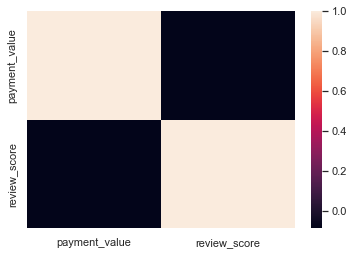

In [356]:
sns.heatmap(data=ville_ranked_sao_paulo[[
            "payment_value", "review_score"]].corr())

Il n'y a pas de correlation entre le montant payé et le score de vente.

Afin d'identifier les tendances d'achats des clients sur le temps il nous faut formater les colonnes temporelles à l'aide de la librairie pandas, sous le forme d'objet datetime.

In [357]:
# Toutes les colonnes Datetimes

colonnes_dates = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                  "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
                  "review_creation_date", "review_answer_timestamp"]


for colonne in colonnes_dates:
    ville_ranked_sao_paulo[colonne] = pd.to_datetime(
        ville_ranked_sao_paulo[colonne])
    
# Formatage 

Nous pouvons maintenant examiner les tendances en fonction de l'heure, la journée, la semaine, et l'année.

In [358]:
df_achat_par_heure_sao_paulo = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.hour)[
    "order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)

# .dt.hour nous donne un décomposition par heure.


df_achat_par_heure_sao_paulo.rename(columns={
                                    "order_id": "Nombre d'achat", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)

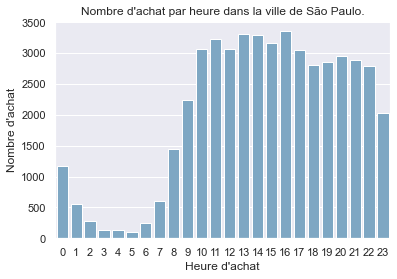

In [359]:
ax = sns.barplot(data=df_achat_par_heure_sao_paulo,
                 x="Heure d'achat", y="Nombre d'achat", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
ax.set_title("Nombre d'achat par heure dans la ville de São Paulo.")
plt.savefig("Tendance São Paulo", dpi=300)
plt.show()

Il est clair que les horaires pendant la nuit sont creuses et que celle de la journée sont les plus intéressantes.

Il y a-t-il des heures lors desquelles, plus d'argent est dépensé en moyenne/ médianne ?

In [360]:
# Aggrégation des valeurs qui nous intéressent, et ranking
payement_par_heure_mean = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.hour)[
    "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

# Rename des catégories pour la lisibilité
payement_par_heure_mean.rename(columns={
    "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)


# Aggrégation des valeurs qui nous intéressent, et ranking
payement_par_heure_median = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.hour)[
    "payment_value"].median().reset_index().sort_values(by="payment_value", ascending=False)

# Rename des catégories pour la lisibilité
payement_par_heure_median.rename(columns={
    "payment_value": "Valeur d'achat median", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)

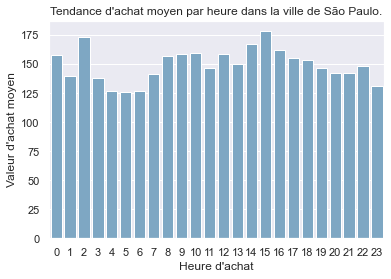

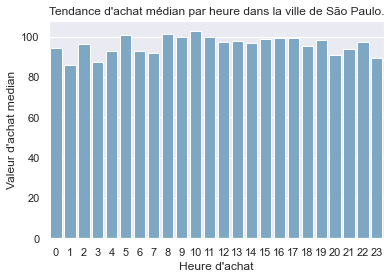

In [361]:
ax = sns.barplot(data=payement_par_heure_mean,
                 x="Heure d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

ax.set_title("Tendance d'achat moyen par heure dans la ville de São Paulo.")

plt.show()


ax_2 = sns.barplot(data=payement_par_heure_median,
                   x="Heure d'achat", y="Valeur d'achat median", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

ax_2.set_title("Tendance d'achat médian par heure dans la ville de São Paulo.")

plt.savefig(
    "Tendance d'achat médian par heure dans la ville de São Paulo", dpi=300)

plt.show()

Au vu du nombre d'observation, nous pouvons en déduire qu'il y a une légère tendance haussière entre 9h et 15h.

Observons au cours des semaines.

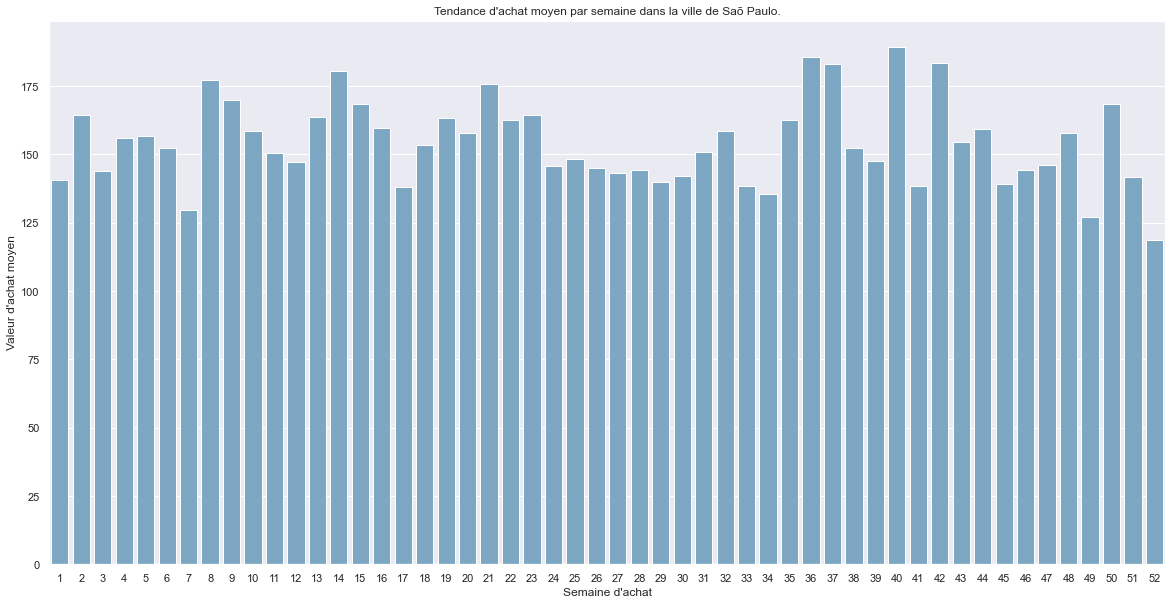

In [362]:
# Aggrégation des valeurs qui nous intéressent, et ranking
payement_par_heure_mean_week = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.week)[
    "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

# ici dt.week, décompose par semaine

# Rename des catégories pour la lisibilité
payement_par_heure_mean_week.rename(columns={
    "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Semaine d'achat"}, inplace=True)

plt.figure(figsize=( 20, 10))

ax = sns.barplot(data=payement_par_heure_mean_week,
                 x="Semaine d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

ax.set_title(
    "Tendance d'achat moyen par semaine dans la ville de Saõ Paulo.")

plt.savefig("Tendance d'achat moyen par semaine dans la ville de Saõ Paulo.", dpi = 300)

plt.show()

Les semaines de septembre montrent le plus gros volume. L'été semble être une saison faible. Entre Mars et Avril, il semble y a avoir une tendance haussière aussi.

Décomposons par mois pour vérifier ces hypothèses.

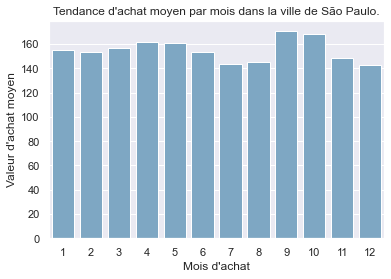

In [388]:
# Aggrégation des valeurs qui nous intéressent, et ranking
payement_par_heure_mean_month = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.month)[
    "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

# ici dt.month décompose par mois

# Rename des catégories pour la lisibilité
payement_par_heure_mean_month.rename(columns={
    "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Mois d'achat"}, inplace=True)

ax = sns.barplot(data=payement_par_heure_mean_month,
                 x="Mois d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

ax.set_title("Tendance d'achat moyen par mois dans la ville de São Paulo.")
plt.savefig("Tendance d'achat moyen par mois dans la ville de São Paulo.", dpi = 300)

plt.show()

Les mois de Septembre et Octobre sont en effet les mois avec le plus haut volume.

Explorons les tendances annuelles.

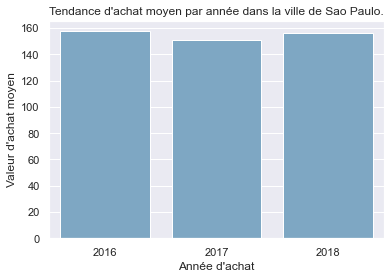

In [364]:
# Aggrégation des valeurs qui nous intéressent, et ranking
payement_par_heure_mean_year = ville_ranked_sao_paulo.groupby(
    ville_ranked_sao_paulo["order_purchase_timestamp"].dt.year)[
    "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

# ici dt.year décompose en année

# Rename des catégories pour la lisibilité
payement_par_heure_mean_year.rename(columns={
    "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Année d'achat"}, inplace=True)

ax = sns.barplot(data=payement_par_heure_mean_year,
                 x="Année d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

ax.set_title(
    "Tendance d'achat moyen par année dans la ville de Sao Paulo.")

plt.show()

Il faut se rappeler que l'année 2016 à un très faible volume par rapport au deux autres années, la variance étant plus haute, il faut se concentrer sur 2017/2018. Les deux années paraissent coude à coude.

### Comparaison avec la seconde ville, Rio de Janeiro.

In [365]:
def Analyse_Ville_Rio_de_Janeiro():

    # cette fonction résume toutes les étapes précendentes pour la ville de Rio de Janeiro.

    ville_ranked_rio_de_janeiro = main_dataframe.loc[main_dataframe["customer_state"] == "RJ"]
    colonnes_dates = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                      "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date",
                      "review_creation_date", "review_answer_timestamp"]

    for colonne in colonnes_dates:
        ville_ranked_rio_de_janeiro[colonne] = pd.to_datetime(
            ville_ranked_rio_de_janeiro[colonne])
    df_achat_par_heure_rio_de_janeiro = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.hour)[
        "order_id"].count().reset_index().sort_values(by="order_purchase_timestamp", ascending=False)

    df_achat_par_heure_rio_de_janeiro.rename(columns={
        "order_id": "Nombre d'achat", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)
    ax = sns.barplot(data=df_achat_par_heure_rio_de_janeiro,
                     x="Heure d'achat", y="Nombre d'achat", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
    ax.set_title("Nombre d'achat par heure dans la ville de Rio de Janeiro.")
    plt.savefig("Tendance Rio de Janeiro", dpi=300)
    plt.show()

    payement_par_heure_mean = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.hour)[
        "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

    payement_par_heure_mean.rename(columns={
        "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)

    payement_par_heure_median = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.hour)[
        "payment_value"].median().reset_index().sort_values(by="payment_value", ascending=False)

    payement_par_heure_median.rename(columns={
        "payment_value": "Valeur d'achat median", "order_purchase_timestamp": "Heure d'achat"}, inplace=True)

    ax = sns.barplot(data=payement_par_heure_mean,
                     x="Heure d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
    ax.set_title(
        "Tendance d'achat moyen par heure dans la ville de Rio de Janeiro.")
    plt.show()

    ax_2 = sns.barplot(data=payement_par_heure_median,
                       x="Heure d'achat", y="Valeur d'achat median", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
    ax_2.set_title(
        "Tendance d'achat médian par heure dans la ville de Rio de Janeiro.")
    plt.savefig(
        "Tendance d'achat médian par heure dans la ville de Rio de Janeiro", dpi=300)
    plt.show()

    # Aggrégation des valeurs qui nous intéressent, et ranking
    payement_par_heure_mean_week = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.week)[
        "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

    # Rename des catégories pour la lisibilité
    payement_par_heure_mean_week.rename(columns={
        "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Semaine d'achat"}, inplace=True)
    plt.figure(figsize=( 20, 10))
    ax = sns.barplot(data=payement_par_heure_mean_week,
                     x="Semaine d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

    ax.set_title(
        "Tendance d'achat moyen par semaine dans la ville de Rio de Janeiro.")

    plt.show()

    # Aggrégation des valeurs qui nous intéressent, et ranking
    payement_par_heure_mean_month = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.month)[
        "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

    # Rename des catégories pour la lisibilité
    payement_par_heure_mean_month.rename(columns={
        "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Mois d'achat"}, inplace=True)
    
    ax = sns.barplot(data=payement_par_heure_mean_month,
                     x="Mois d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

    ax.set_title(
        "Tendance d'achat moyen par mois dans la ville de Rio de Janeiro.")

    plt.show()

    # Aggrégation des valeurs qui nous intéressent, et ranking
    payement_par_heure_mean_years = ville_ranked_rio_de_janeiro.groupby(
        ville_ranked_rio_de_janeiro["order_purchase_timestamp"].dt.year)[
        "payment_value"].mean().reset_index().sort_values(by="payment_value", ascending=False)

    # Rename des catégories pour la lisibilité
    payement_par_heure_mean_years.rename(columns={
        "payment_value": "Valeur d'achat moyen", "order_purchase_timestamp": "Année d'achat"}, inplace=True)

    ax = sns.barplot(data=payement_par_heure_mean_years,
                     x="Année d'achat", y="Valeur d'achat moyen", palette = sns.color_palette(palette = "PuBu", n_colors = 1))

    ax.set_title(
        "Tendance d'achat moyen par année dans la ville de Rio de Janeiro.")

    plt.show()
    return

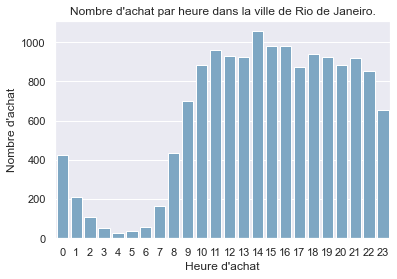

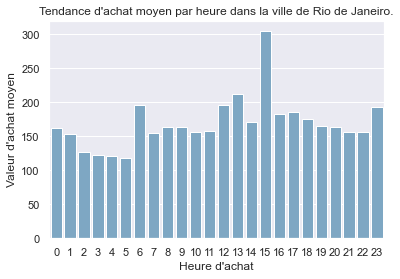

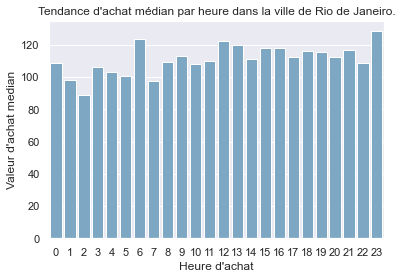

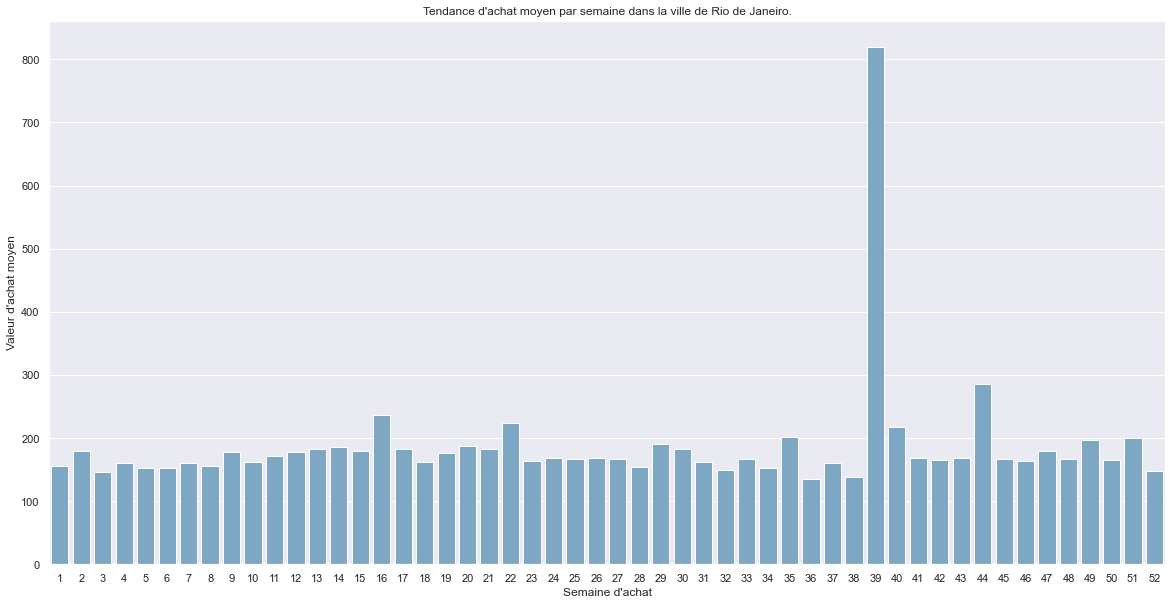

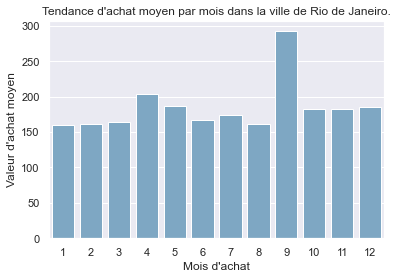

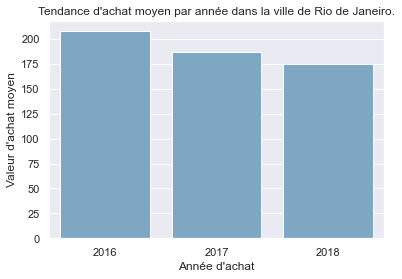

In [366]:
Analyse_Ville_Rio_de_Janeiro()

Nous observons une plus grande variance des données, mais aussi un nombre plus faible d'observations.

Le mois de Septembre est aussi ici, sur les trois dernières années, un énorme outlier. Le mois de Septembre parait être un mois clé pour le chiffre d'affaire de l'entreprise.

## Exploration des catégories de produits

### Catégories les plus rentables

In [367]:
# Aggrégation des valeurs qui nous intéressent, et ranking
categ_plus_rentable = main_dataframe.groupby("product_category_name_english").agg(
    {'order_id': 'nunique', 'payment_value': 'sum'}).reset_index().sort_values("payment_value", ascending=False)[:10]

# Rename des catégories pour la lisibilité
categ_plus_rentable.rename(columns={"order_id": "Count", "product_category_name_english": "Catégorie du produit",
                           "payment_value": "Valeur de la commande"}, inplace=True)

categ_plus_rentable

,Catégorie du produit,Count,Valeur de la commande
7,bed_bath_table,9313,1725465.67
43,health_beauty,8770,1646292.53
15,computers_accessories,6649,1592611.66
39,furniture_decor,6398,1427214.01
70,watches_gifts,5576,1420682.17
65,sports_leisure,7669,1390581.87
49,housewares,5843,1091709.15
42,garden_tools,3496,834757.45
5,auto,3877,802254.74
20,cool_stuff,3599,772616.70


La catégorie la plus rentable et bed_bath_table, suivie de près par health_beauty.

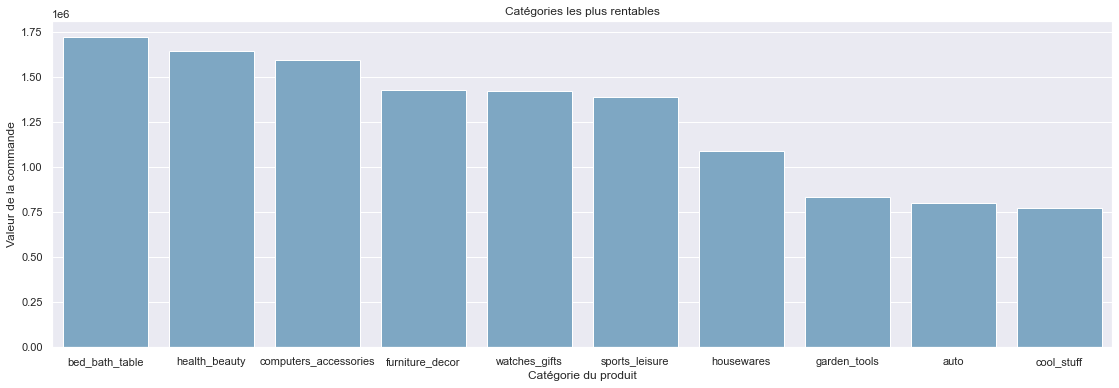

In [368]:
plt.figure(figsize=(19, 6))

ax = sns.barplot(data=categ_plus_rentable,
                 x="Catégorie du produit", y="Valeur de la commande", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
ax.set_title("Catégories les plus rentables")

plt.savefig("Catégories les plus rentables", dpi=300)
plt.show()

Explorons la catégorie bed bath table, plus en détail.

### Bed, bath, table

In [369]:
bed_bath_table_df = main_dataframe.loc[main_dataframe["product_category_name_english"]
                                       == "bed_bath_table"]

In [370]:
client_ranked = bed_bath_table_df.groupby("customer_unique_id")["payment_value"].sum(
).reset_index().sort_values("payment_value", ascending=False)
client_ranked.rename(columns={"payment_value": "Valeur totale"}, inplace=True)

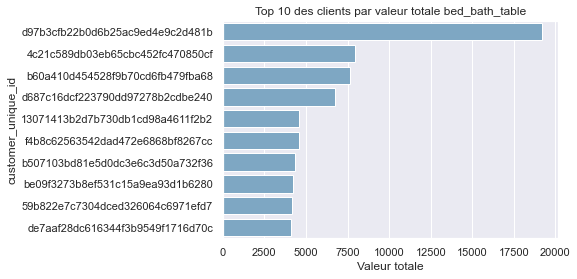

In [371]:
client_ranked.rename(columns={"payment_value": "Valeur totale"}, inplace=True)
ax = sns.barplot(x="Valeur totale", y="customer_unique_id",
                 data=client_ranked[:10], palette = sns.color_palette(palette = "PuBu", n_colors = 1))
ax.set_title("Top 10 des clients par valeur totale bed_bath_table")


plt.savefig("Top 10 des clients par valeur totale bed_bath_table", dpi=300)

Nous observons que la catégorie est dominée par un client en particulier, que se passe-t-il lorsque l'on enlève ce client, pour l'ordre des catégories les plus rentables.

In [372]:
client_outlier = client_ranked[client_ranked["Valeur totale"]
                               == client_ranked["Valeur totale"].max()]

In [373]:
# drop de l'outlier

dataframe_pour_grouper = main_dataframe.drop(
    main_dataframe[main_dataframe["customer_unique_id"] == "d97b3cfb22b0d6b25ac9ed4e9c2d481b"].index)

In [374]:
categ_plus_rentable_sans_outliers = dataframe_pour_grouper.groupby("product_category_name_english").agg(
    {'order_id': 'nunique', 'payment_value': 'sum'}).reset_index().sort_values("payment_value", ascending=False)[:10]
categ_plus_rentable_sans_outliers.rename(columns={"order_id": "count", "product_category_name_english": "Catégorie du produit",
                                                  "payment_value": "Valeur de la commande"}, inplace=True)

categ_plus_rentable_sans_outliers

,Catégorie du produit,count,Valeur de la commande
7,bed_bath_table,9311,1706298.41
43,health_beauty,8770,1646292.53
15,computers_accessories,6649,1592611.66
39,furniture_decor,6398,1427214.01
70,watches_gifts,5576,1420682.17
65,sports_leisure,7669,1390581.87
49,housewares,5843,1091709.15
42,garden_tools,3496,834757.45
5,auto,3877,802254.74
20,cool_stuff,3599,772616.70


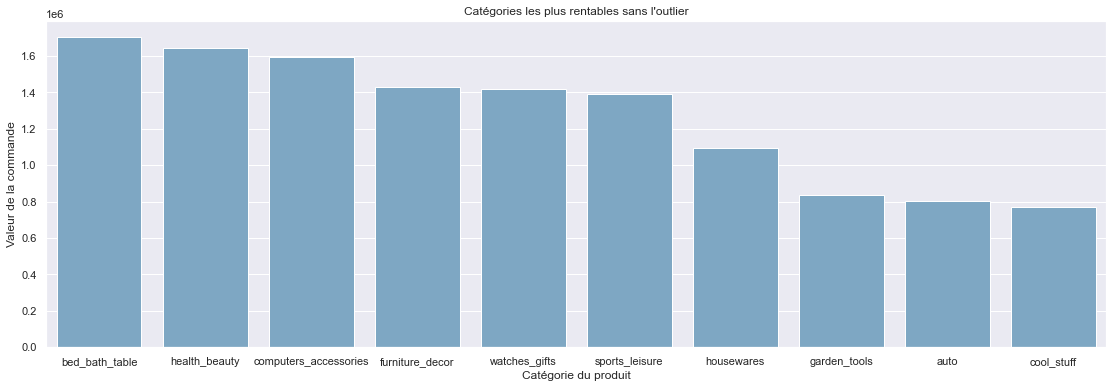

In [375]:
plt.figure(figsize=(19, 6))

ax = sns.barplot(data=categ_plus_rentable_sans_outliers,
                 x="Catégorie du produit", y="Valeur de la commande", palette = sns.color_palette(palette = "PuBu", n_colors = 1))
ax.set_title("Catégories les plus rentables sans l'outlier")

plt.savefig("Catégories les plus rentables sans l'outlier", dpi=300)
plt.show()

En enlevant le client outlier, nous rapprochons les deux catégories en tête, mais ne changeons pas l'ordre. Il est donc clair que bed_bath_table est la catégorie dominante en terme de revenu.

## Corrélation

<AxesSubplot:>

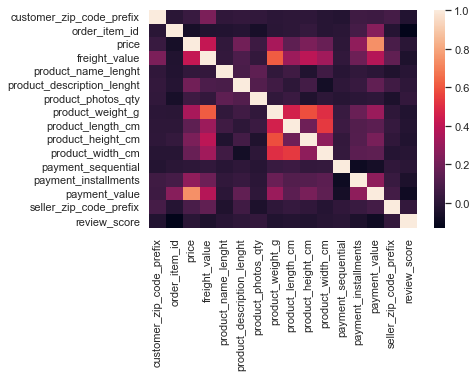

In [376]:
sns.heatmap(data=main_dataframe.corr())

Au niveau des corrélations générales de catégories quantifiées, il ne semble pas y avoir de corrélation significatives, mis à part les corrélations entre les dimensions et poids, le prix de vente, et le prix du colis.

## Tendances clients

Explorons les tendances des clients.

### Distributions des achats/commandes.

In [377]:
total_commandes_par_client = main_dataframe.groupby("customer_unique_id")["payment_value"].median(
).reset_index()

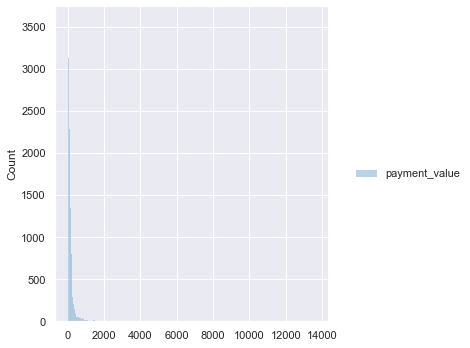

In [378]:
sns.displot(data = total_commandes_par_client, palette= "PuBu")

Passons au logarithme pour avoir une meilleur idée de la distribution.

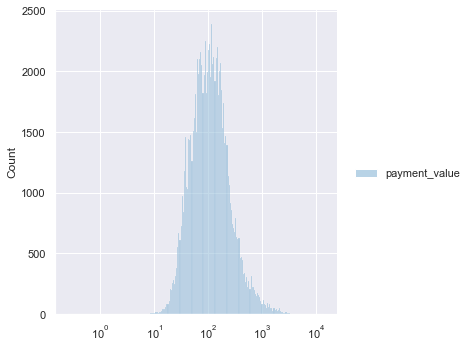

In [379]:
g = sns.displot(data=total_commandes_par_client, log_scale=True,
                palette=sns.color_palette(palette="PuBu", n_colors=1))
g.savefig("Distribution commande median par client", dpi=300)

La distribution est centrée sur 100, et parait être légèrement skewed à droite.

In [380]:
total_commandes_par_client.describe()

,payment_value
count,93396.000000
mean,158.582579
std,217.640857
min,0.250000
25%,60.750000
50%,103.550000
75%,175.572500
max,13664.080000


### Score

In [381]:
score_par_client = main_dataframe.groupby("customer_unique_id")["review_score"].max(
).reset_index()

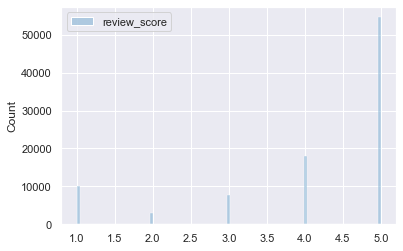

In [382]:
g = sns.histplot(data = score_par_client, palette= "PuBu")
plt.savefig("Distribution score median par client", dpi = 300)

In [383]:
score_par_client.describe()

,review_score
count,93396.000000
mean,4.116461
std,1.323236
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Les scores sont très positifs. 

### Fréquence d'achat

In [384]:
frequency_df = main_dataframe.groupby(["customer_unique_id"]).agg(
    {"order_id": "nunique"}).reset_index()

frequency_df.rename(columns={"order_id": "Frequency"}, inplace=True)

frequency_df.describe()

,Frequency
count,93396.000000
mean,1.033406
std,0.208235
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [385]:
frequency_df_superieur_1 = frequency_df.loc[frequency_df["Frequency"] > 1]

In [386]:
frequency_df_superieur_1.shape[0]/frequency_df.shape[0]

0.030054820334917985

Il a environ 3% de client dans notre jeu de données, qui ont achetés plus d'une fois sur Olist.
Cela posera un challenge pour notre analyse. 

In [387]:
frequency_df_superieur_1.describe()

,Frequency
count,2807.000000
mean,2.111507
std,0.494481
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,15.000000


Parmis ceux qui achètent plus d'une fois, ils n'achètent pas plus que 2 fois en grande majorité.